29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0893 - val_loss: 0.0334
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0309 - val_loss: 0.0253
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0240 - val_loss: 0.0210
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0200 - val_loss: 0.0181
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0174 - val_loss: 0.0163
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0159 - val_loss: 0.0152
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0149 - val_loss: 0.0145
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0143 - val_loss: 0.0140
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0138 - val_loss: 0.0137
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4145 - loss: 2.4612 - val_accuracy: 0.7631 - val_loss: 0.6762
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7861 - loss: 0.6112 - val_accuracy: 0.7885 - val_loss: 0.5782
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8094 - loss: 0.5329 - val_accuracy: 0.8082 - val_loss: 0.5345
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8223 - loss: 0.5021 - val_accuracy: 0.8157 - val_loss: 0.5209
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8277 - loss: 0.4828 - val_accuracy: 0.8219 - val_loss: 0.5010
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8369 - loss: 0.4614 - val_accuracy: 0.8210 - val_loss: 0.4929
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8397 - loss: 0.4545 - val_accuracy: 0.8271 - val_loss: 0.4875
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8401 - loss: 0.4436 - val_accuracy: 0.8317 - val_

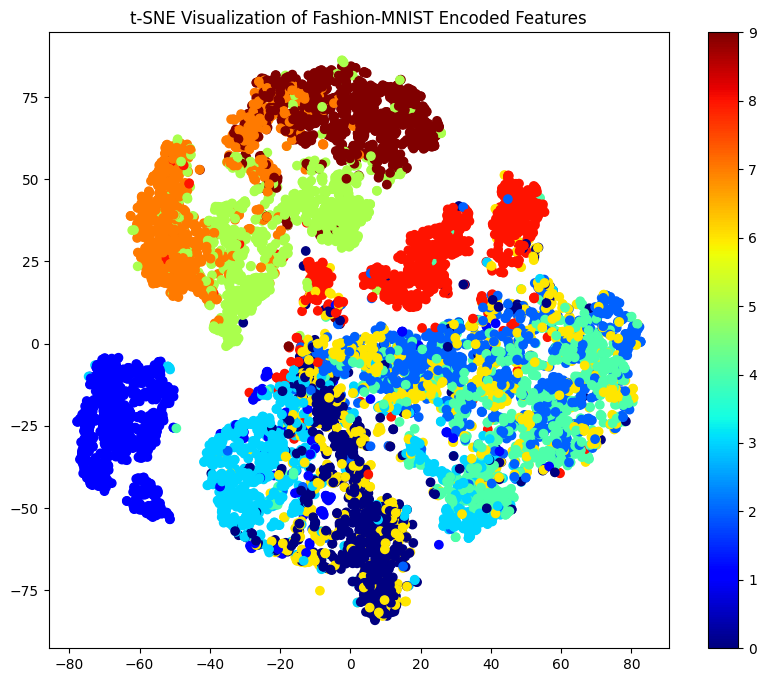

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


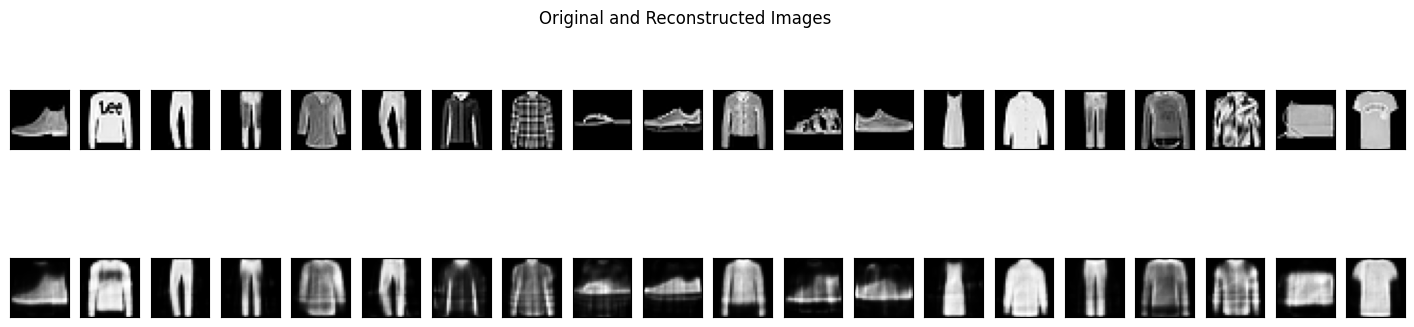

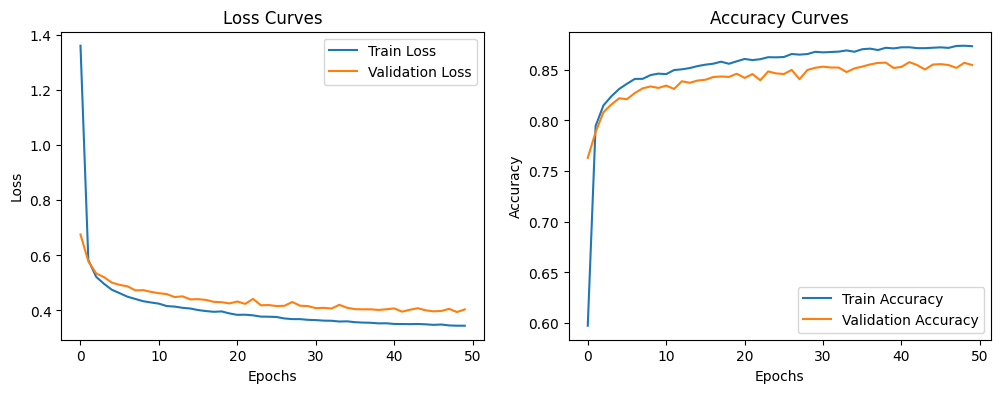

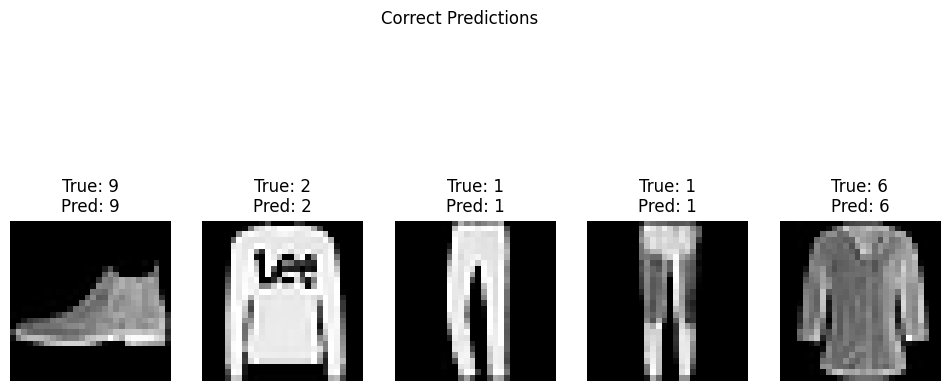

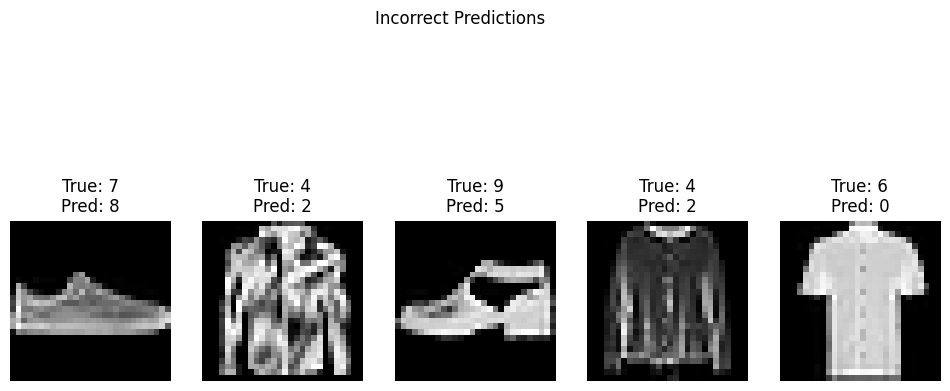

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8587 - loss: 0.3940
Test Accuracy: 85.48%


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense
from sklearn.manifold import TSNE

# Load the Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values to between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the images for the autoencoder
x_train_flat = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test_flat = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define the autoencoder model
encoding_dim = 32  # Latent space dimension
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(x_train_flat, x_train_flat, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test_flat, x_test_flat))

# Encode the train and test images
encoder = Model(input_img, encoded)
x_train_encoded = encoder.predict(x_train_flat)
x_test_encoded = encoder.predict(x_test_flat)

# Define the classifier model
classifier = Sequential([
    Dense(64, activation='relu', input_shape=(encoding_dim,)),
    Dense(10, activation='softmax')  # 10 classes for Fashion MNIST
])

classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the classifier on encoded images
history = classifier.fit(x_train_encoded, y_train, epochs=50, batch_size=256, validation_data=(x_test_encoded, y_test))

# Get the predicted classes for the test set
y_pred = np.argmax(classifier.predict(x_test_encoded), axis=1)

# Visualize the t-SNE scatter plot
encoded_imgs = encoder.predict(x_test_flat)  # Re-encode test images for t-SNE
tsne = TSNE(n_components=2)
x_tsne = tsne.fit_transform(encoded_imgs)

plt.figure(figsize=(10, 8))
plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=y_test, cmap="jet")
plt.colorbar()
plt.title('t-SNE Visualization of Fashion-MNIST Encoded Features')
plt.show()

# Visualize original and reconstructed images
decoded_imgs = autoencoder.predict(x_test_flat)

n = 20  # Number of images to display
plt.figure(figsize=(18, 4))
for i in range(n):
    # Original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.suptitle('Original and Reconstructed Images')
plt.show()

# Find the indices of correctly and incorrectly predicted examples
correct_indices = np.where(y_pred == y_test)[0]
incorrect_indices = np.where(y_pred != y_test)[0]

# Function to plot images
def plot_images(indices, title, num_images=5):
    plt.figure(figsize=(12, 6))
    for i, idx in enumerate(indices[:num_images]):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
        plt.title(f'True: {y_test[idx]}\nPred: {y_pred[idx]}')
        plt.axis('off')
    plt.suptitle(title)
    plt.show()


# Plot loss and accuracy curves
def plot_history(history):
    plt.figure(figsize=(12, 4))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Curves')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Curves')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()


# Call the function to plot loss and accuracy
plot_history(history)

# Display some correct predictions
plot_images(correct_indices, "Correct Predictions", num_images=5)

# Display some incorrect predictions
plot_images(incorrect_indices, "Incorrect Predictions", num_images=5)

# Evaluate the classifier
test_loss, test_acc = classifier.evaluate(x_test_encoded, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")